# WELCOME TO THE NOTEBOOK
---

Importing Modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Loading the data

In [42]:
data = pd.read_json("dataset/movies_dataset.json")
data

,color,director_name,num_critic_for_reviews,duration,gross,genres,star_name,movie_title,movie_imdb_link,language,country,budget,title_year,imdb_score
0,Color,James Cameron,723.0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,237000000.0,2009.0,7.9
1,Color,Gore Verbinski,302.0,169.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,300000000.0,2007.0,7.1
2,Color,Sam Mendes,602.0,148.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,245000000.0,2015.0,6.8
3,Color,Christopher Nolan,813.0,164.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,250000000.0,2012.0,8.5
4,NaN,Doug Walker,NaN,NaN,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,English,Canada,NaN,2013.0,7.7
5039,Color,NaN,43.0,43.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,English,USA,NaN,NaN,7.5
5040,Color,Benjamin Roberds,13.0,76.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,English,USA,1400.0,2013.0,6.3
5041,Color,Daniel Hsia,14.0,100.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,English,USA,NaN,2012.0,6.3


Check the dataframe shape (#rows and #columns)

In [3]:
a, b = data.shape
print("rows: ", a)
print("columns: ", b)

rows:  5043
columns:  14


Let's check the data types of the columns

In [4]:
data.dtypes

color                      object
director_name              object
num_critic_for_reviews    float64
duration                  float64
gross                     float64
genres                     object
star_name                  object
movie_title                object
movie_imdb_link            object
language                   object
country                    object
budget                    float64
title_year                float64
imdb_score                float64
dtype: object

Column Selection

In [5]:
data['color']
data.color

0       Color
1       Color
2       Color
3       Color
4         NaN
        ...  
5038    Color
5039    Color
5040    Color
5041    Color
5042    Color
Name: color, Length: 5043, dtype: object

---

## Data Preparation
Remove some columns:    
   
   - `movie_imdb_link`
   - `num_critic_for_reviews`
   - `genre`

In [6]:
data.drop(axis = 1, columns=['movie_imdb_link', 'num_critic_for_reviews', 'genres'], inplace=True)

Exercise: Remove the rest of the columns 


In [7]:
data.columns

Index(['color', 'director_name', 'duration', 'gross', 'star_name',
       'movie_title', 'language', 'country', 'budget', 'title_year',
       'imdb_score'],
      dtype='object')

Let's check the shape again

In [8]:
a, b = data.shape
print("rows: ", a)
print("columns: ", b)

rows:  5043
columns:  11


Let's convert the dtype of `title_year` column to integer

In [9]:
data.title_year = data.title_year.astype('Int64')

Let's check the dataframe again

In [10]:
data.title_year

0       2009
1       2007
2       2015
3       2012
4       <NA>
        ... 
5038    2013
5039    <NA>
5040    2013
5041    2012
5042    2004
Name: title_year, Length: 5043, dtype: Int64

Renaming some columns: 
- changing `gross` to `movie_income`

In [11]:
data.rename(columns={'gross':'movie_income'}, inplace=True)

Exercise: Rename the `budget` column to `movie_budget`

In [12]:
dict1 = {'budget':'movie_budget'}
data.rename(columns=dict1, inplace=True)
data.columns

Index(['color', 'director_name', 'duration', 'movie_income', 'star_name',
       'movie_title', 'language', 'country', 'movie_budget', 'title_year',
       'imdb_score'],
      dtype='object')

In [13]:
cat = []
num = []
for col in data:
    if data[col].nunique()>10:
        num.append(col)
    else:
        cat.append(col)

print(num)
print(cat)

['director_name', 'duration', 'movie_income', 'star_name', 'movie_title', 'language', 'country', 'movie_budget', 'title_year', 'imdb_score']
['color']


---
### Data Analysis 


Let's checkout the distribution of `duration` column using a histogram.


<Axes: xlabel='duration', ylabel='Count'>

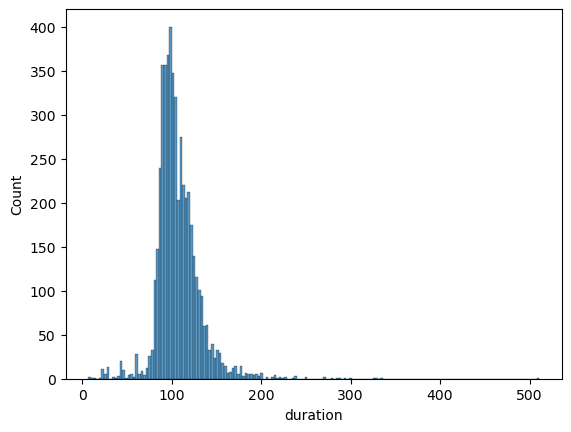

In [14]:
sns.histplot(data.duration)

Text(0.5, 1.0, 'Movie Duration Histogram')

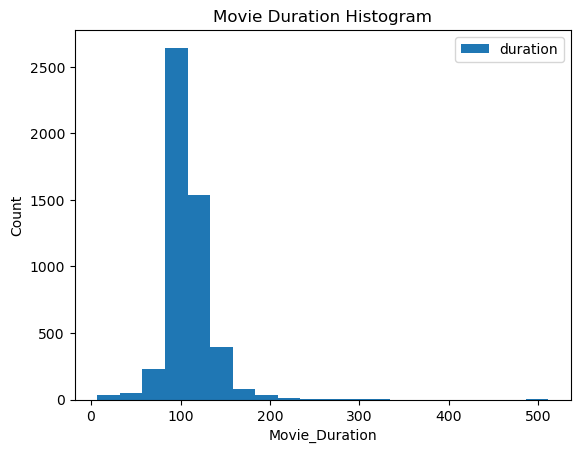

In [15]:
ax = data.duration.hist(grid=False, legend=True, bins=20)
ax.set_xlabel('Movie_Duration')
ax.set_ylabel("Count")
ax.set_title('Movie Duration Histogram')

Exercise: Create a hitogram to see the distribution of `imdb_score` column

<Axes: xlabel='imdb_score', ylabel='Count'>

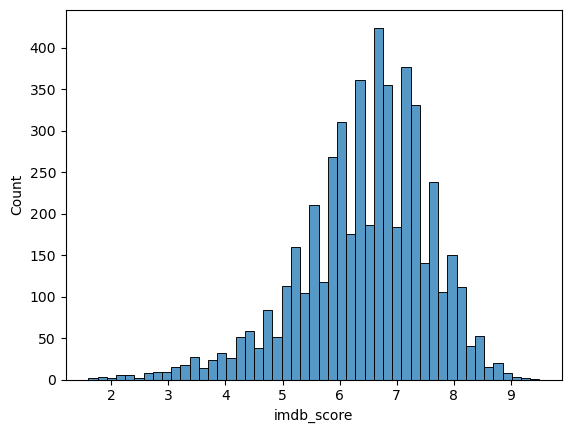

In [16]:
sns.histplot(data.imdb_score)

Text(0.5, 1.0, 'IMDB Score Histogram')

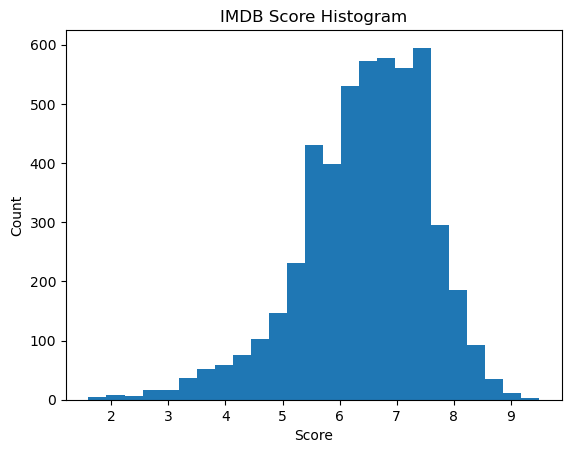

In [17]:
ax = data.imdb_score.hist(grid=False,bins=25)
ax.set_xlabel('Score')
ax.set_ylabel('Count')
ax.set_title('IMDB Score Histogram')

Let's check how many movies have the `imdb_score` less than `4`.

In [18]:
low_rating_movie = data[data.imdb_score < 4]

In [19]:
low_rating_movie.shape

(156, 11)

Exercise: Use a histogram to visualize the distribution of movie IMdb score in that are produced in `USA`.

Text(0.5, 1.0, 'IMDB Scores of Movies in USA')

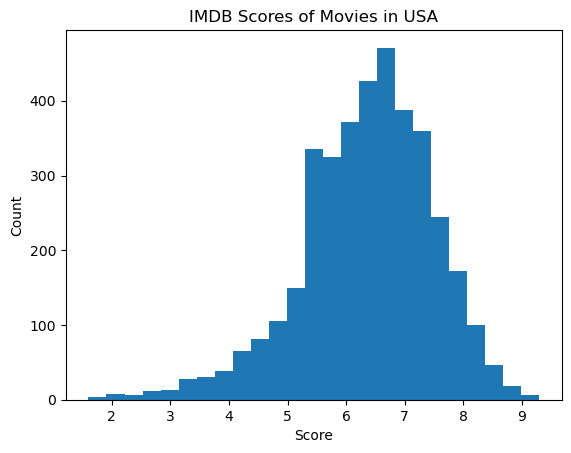

In [20]:
movie_USA = data[data.country == 'USA']
ax = movie_USA.imdb_score.hist(grid=False, bins=25)
ax.set_xlabel('Score')
ax.set_ylabel('Count')
ax.set_title('IMDB Scores of Movies in USA')

Answer to the following Analytical questions: 

Question 1: Use Histograms to compare the disribution of movie `imdb_score` column related to movies produced in `France` and `Canada`. 

While creating the histgoram:
- Set the number of bins to 20 
- Set the xAxis Label 
- Set the yAxis Label
- Remove the grid lines


Text(0.5, 1.0, 'IMDB Score of movies in Canada')

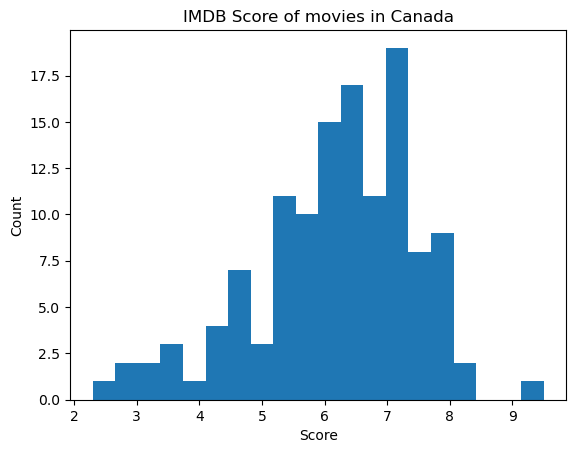

In [21]:
# Create the histogram for Canada here 
ax = data[data.country == 'Canada'].imdb_score.hist(grid=False,bins=20)
ax.set_xlabel('Score')
ax.set_ylabel('Count')
ax.set_title('IMDB Score of movies in Canada')

Text(0.5, 1.0, 'IMDB Score of movies in France')

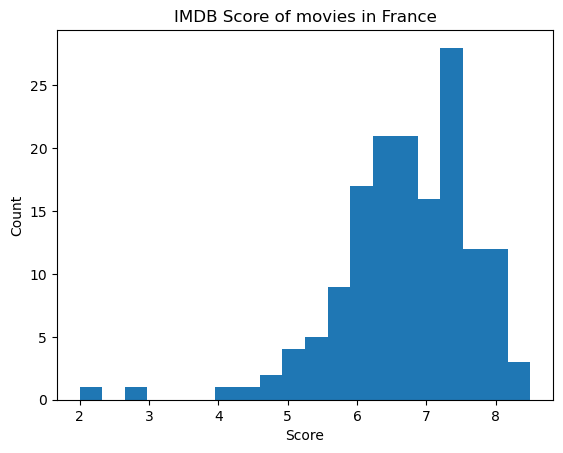

In [22]:
# Create the histogram for France here 
ax = data[data.country == 'France'].imdb_score.hist(grid=False,bins=20)
ax.set_xlabel('Score')
ax.set_ylabel('Count')
ax.set_title('IMDB Score of movies in France')

Question 2: Create a histogram to check the distribution of `movie_budget` spent to produce Black&White movies.

While creating the histgoram:
- Set the number of bins to 10 
- Set the xAxis Label 
- Set the yAxis Label
- Remove the grid lines


Text(0.5, 1.0, 'Budget spent on Black and White Movies')

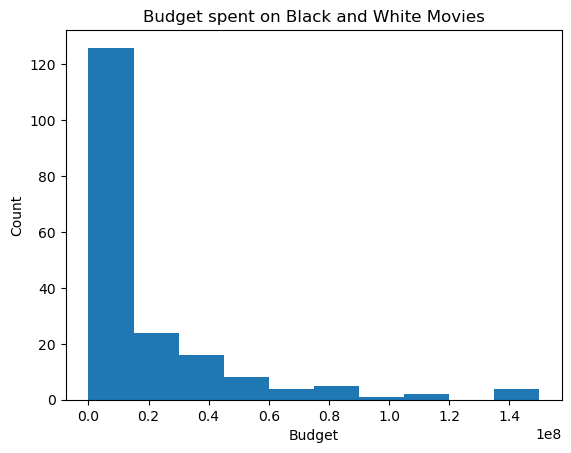

In [23]:
#To go back to the tree, click on the Jupyter icon
ax = data[data.color == 'Black and White'].movie_budget.hist(grid=False,bins=10)
ax.set_xlabel('Budget')
ax.set_ylabel('Count')
ax.set_title('Budget spent on Black and White Movies')

---
### Let's answer to some analytical questions 
    
Question 1 - In which year we have the `highest` and `lowest` number of movies?

Now finding out number of movies per year

In [24]:
count_per_year = data.groupby('title_year').size()
count_per_year.idxmax()

2009

Let's create a line chart to show the result

Text(0, 0.5, 'Movies')

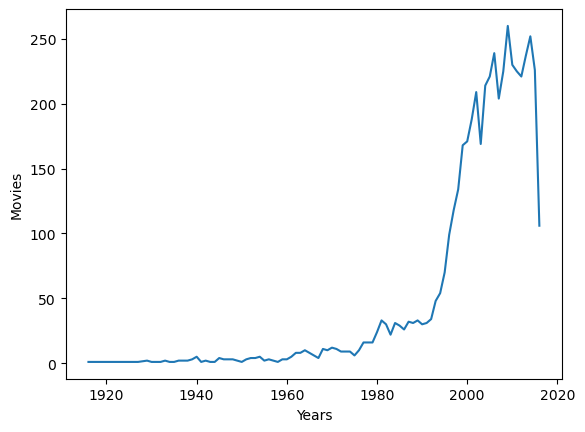

In [25]:
ax = count_per_year.plot()
ax.set_xlabel('Years')
ax.set_ylabel('Movies')

Question 2 - In which year we have `minimum` and `maximum` average `imdb_score` ? 

Finding average imdb score per year 

In [26]:
avg_rating_per_year = data.groupby('title_year')['imdb_score'].mean()
avg_rating_per_year

title_year
1916    8.000000
1920    4.800000
1925    8.300000
1927    8.300000
1929    7.150000
          ...   
2012    6.266516
2013    6.369620
2014    6.228175
2015    6.033628
2016    6.399057
Name: imdb_score, Length: 91, dtype: float64

Let's Use a barchart to visualize the result

<Axes: title={'center': 'Avg IMDB Score per year'}, xlabel='title_year'>

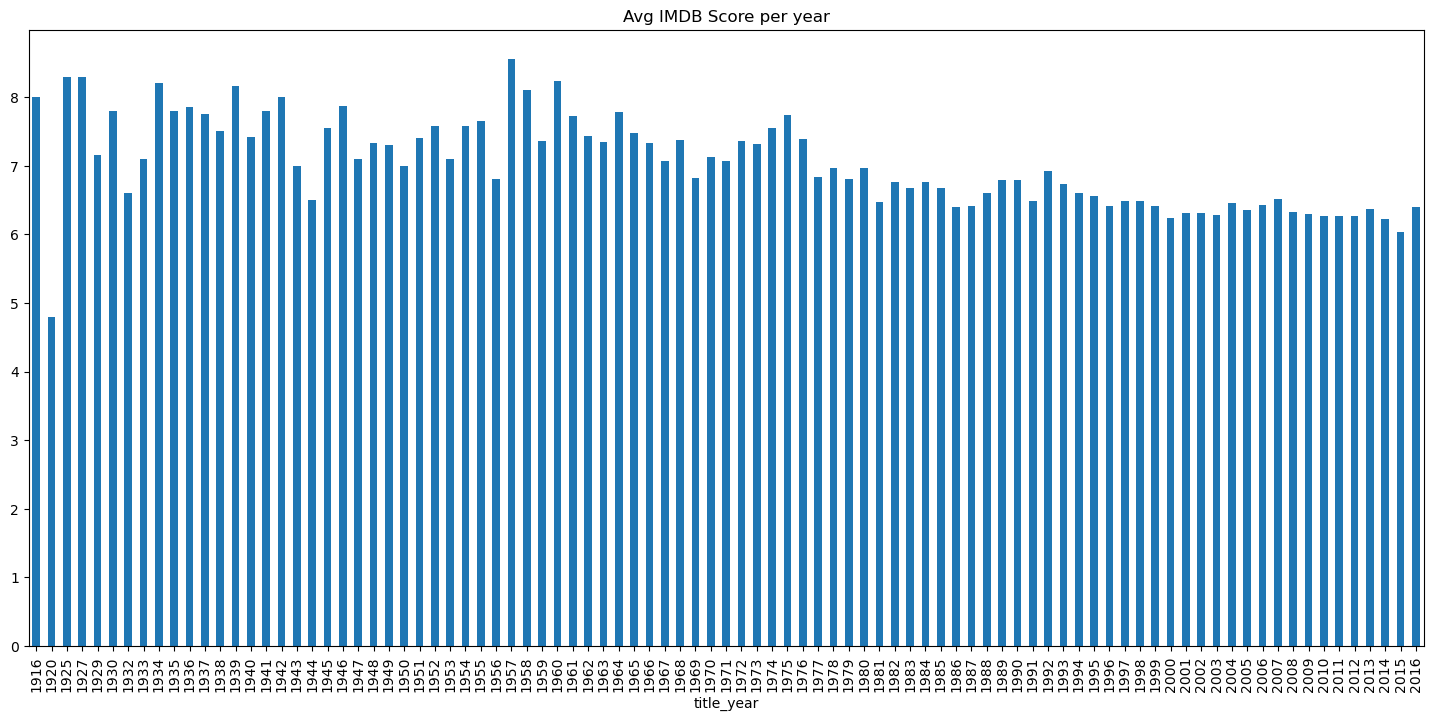

In [27]:
avg_rating_per_year.plot(kind='bar', figsize=(18,8), title='Avg IMDB Score per year')

Exercise: 
Question 3 - In which year we have the `minimum` and `maximum` spent movie budget?

`hint: use a line chart to visualize your results.` 

<Axes: xlabel='title_year'>

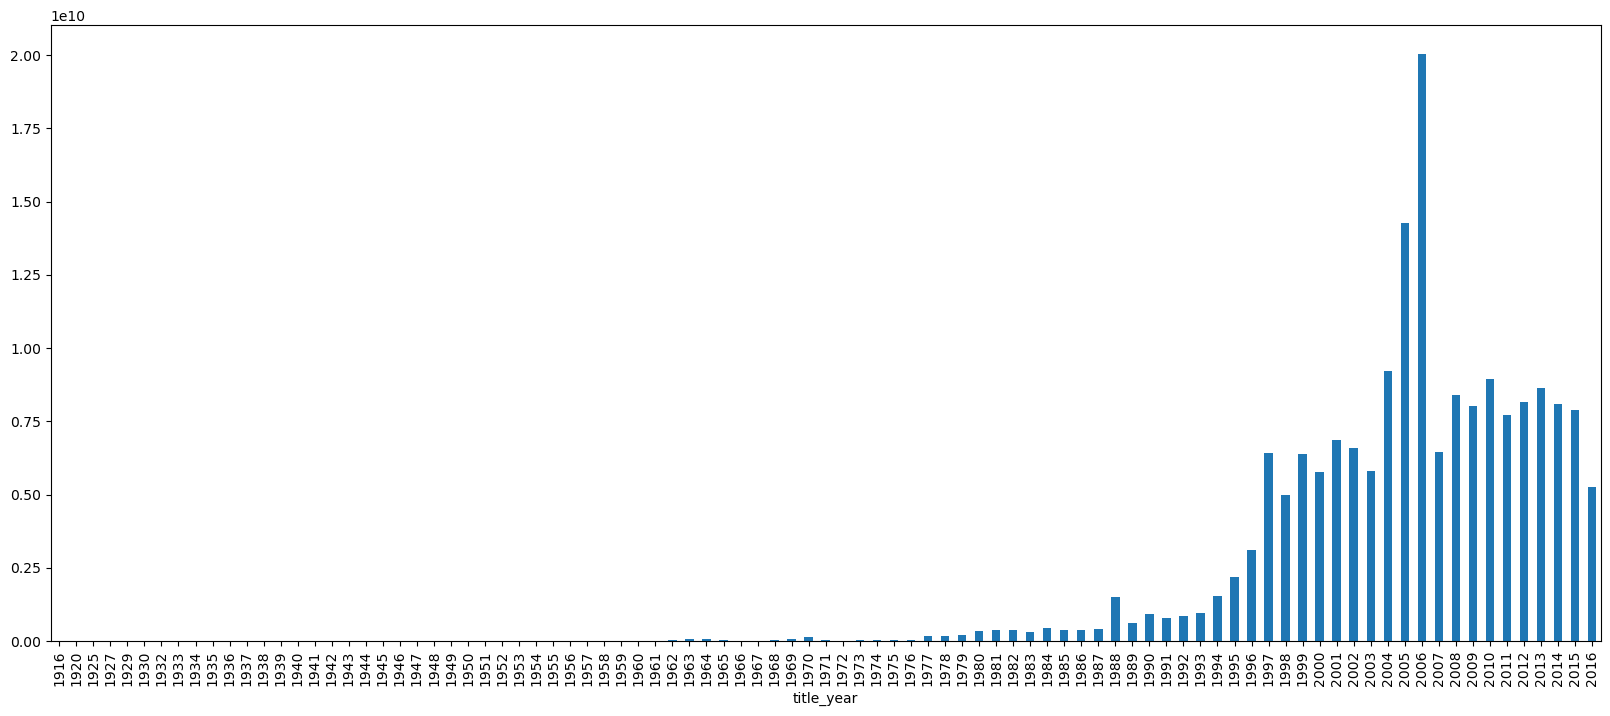

In [28]:
data.groupby('title_year')['movie_budget'].sum().plot(kind='bar', figsize=(20,8))

Question 1: Which country has gained the highest average IMdb Score according to our data? <br>
Use a bar chart to visualize your results

Text(0, 0.5, 'Avg Score')

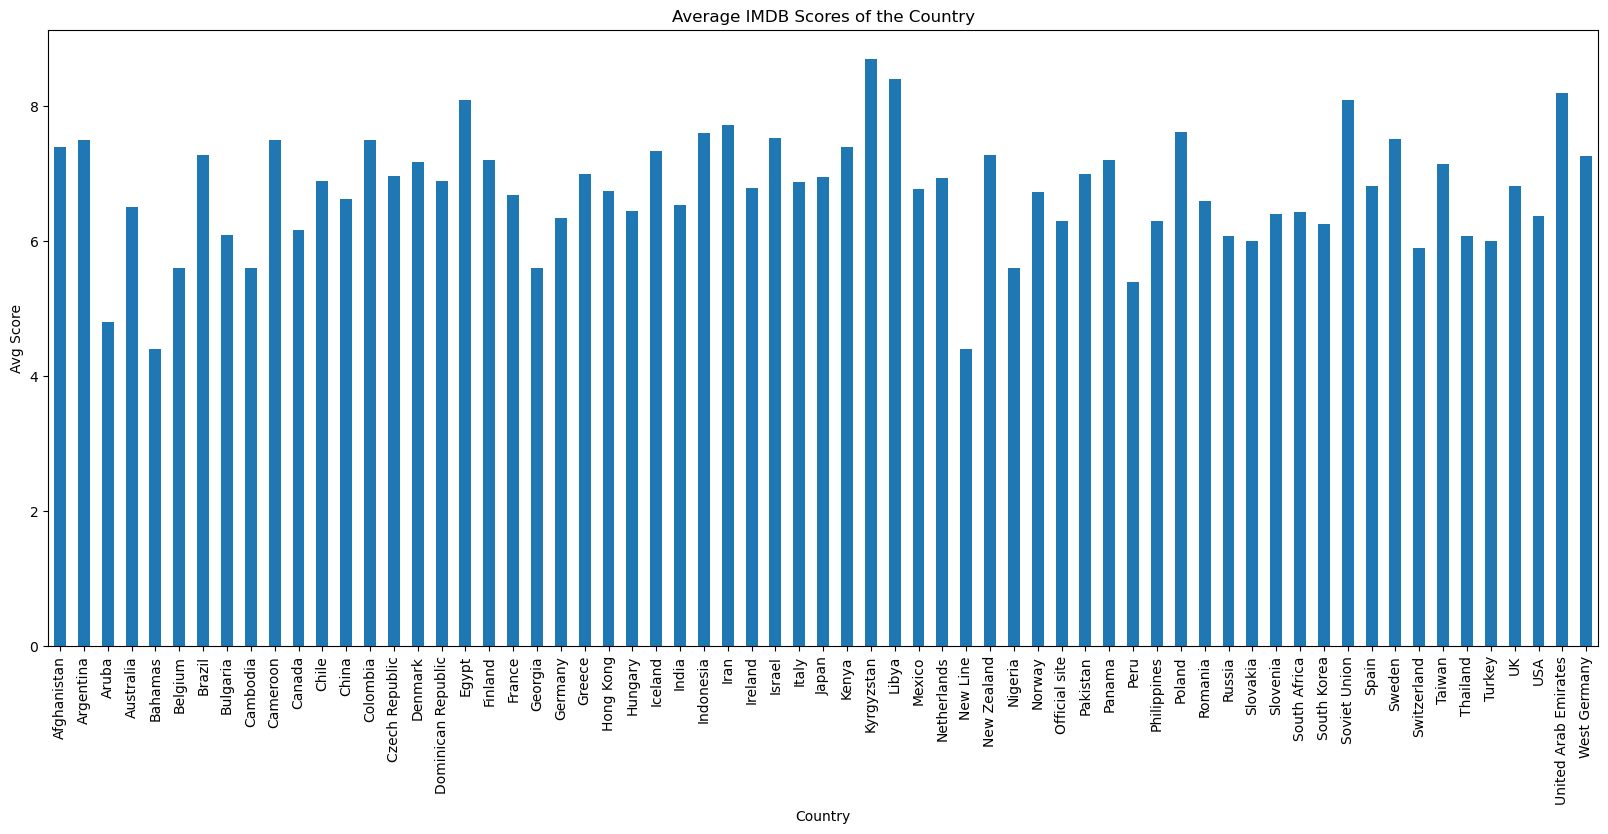

In [29]:
# Write your code here
# data.groupby('country')['imdb_score'].mean().plot(kind='bar',figsize=(20,8))
avgscores = data.groupby('country')['imdb_score'].mean()
ax=avgscores.plot(kind='bar', figsize=(20,8), title='Average IMDB Scores of the Country')
ax.set_xlabel('Country')
ax.set_ylabel('Avg Score')

Question 2: How many `colored` and `Black&White` movies do we have in our dataset?

In [30]:
# Write your code here
data.groupby('color').size()
# data.groupby('color').size().plot(kind='bar')

color
Black and White     209
Color              4815
dtype: int64

Question 3: Which movies of `Christopher Nolan` has the highest IMdb Score? <br>
Use a barchart to visualize the results

<Axes: xlabel='movie_title'>

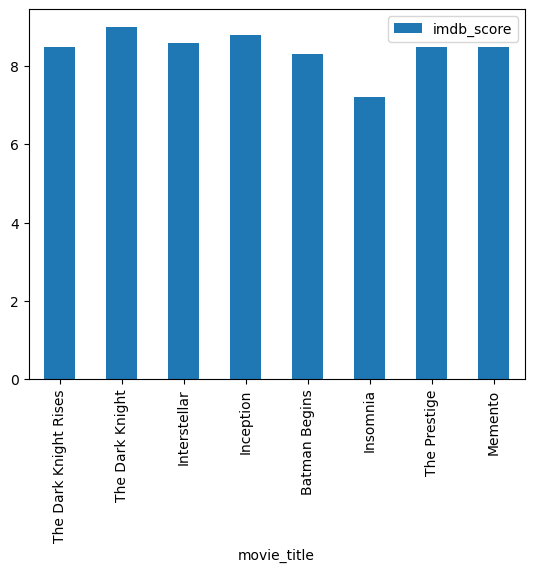

In [31]:
# Write your code here
data[data.director_name == 'Christopher Nolan'].plot(kind='bar', x='movie_title', y='imdb_score')

Question 4: Use a line chart to visualize how many movies have been produced in `USA` from `2010` to `2015`. 

In [32]:
# Write your code here
data_new = data[(data.country == 'USA') & (data.title_year > 2010) & (data.title_year < 2015)]
data_new.shape[0]

695

<Axes: xlabel='title_year'>

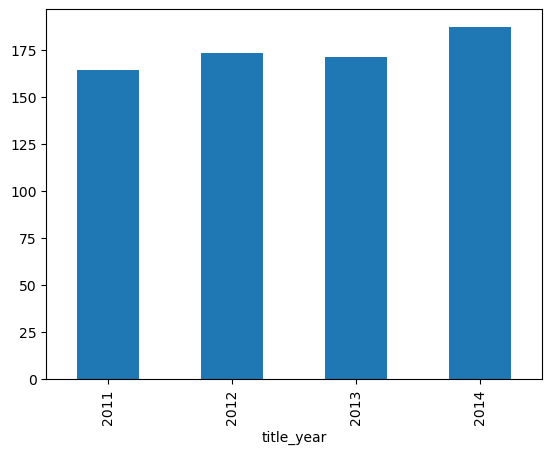

In [33]:
data_new.groupby('title_year').size().plot.bar()

Question 4 - Is there any relationship between IMdb score of a movie and the movie income?

To approaches to solve this question:
- Visual Correlation Analysis 
- Generating the Correlation Matirx

In [34]:
data_new = data[['imdb_score', 'movie_income']]
data_new
# sns.scatterplot(x=data.imdb_score, y=data.movie_income)

,imdb_score,movie_income
0,7.9,760505847.0
1,7.1,309404152.0
2,6.8,200074175.0
3,8.5,448130642.0
4,7.1,NaN
...,...,...
5038,7.7,NaN
5039,7.5,NaN
5040,6.3,NaN
5041,6.3,10443.0


Let's drop the rows with `non` values

In [35]:
data_new.dropna(inplace=True)
data_new

C:\Users\Shradha Agarwal\AppData\Local\Temp\ipykernel_2628\2636871734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new.dropna(inplace=True)


,imdb_score,movie_income
0,7.9,760505847.0
1,7.1,309404152.0
2,6.8,200074175.0
3,8.5,448130642.0
5,6.6,73058679.0
...,...,...
5034,6.3,70071.0
5035,6.9,2040920.0
5037,6.4,4584.0
5041,6.3,10443.0


Let's create a scatter plot to see the data

<Axes: xlabel='imdb_score', ylabel='movie_income'>

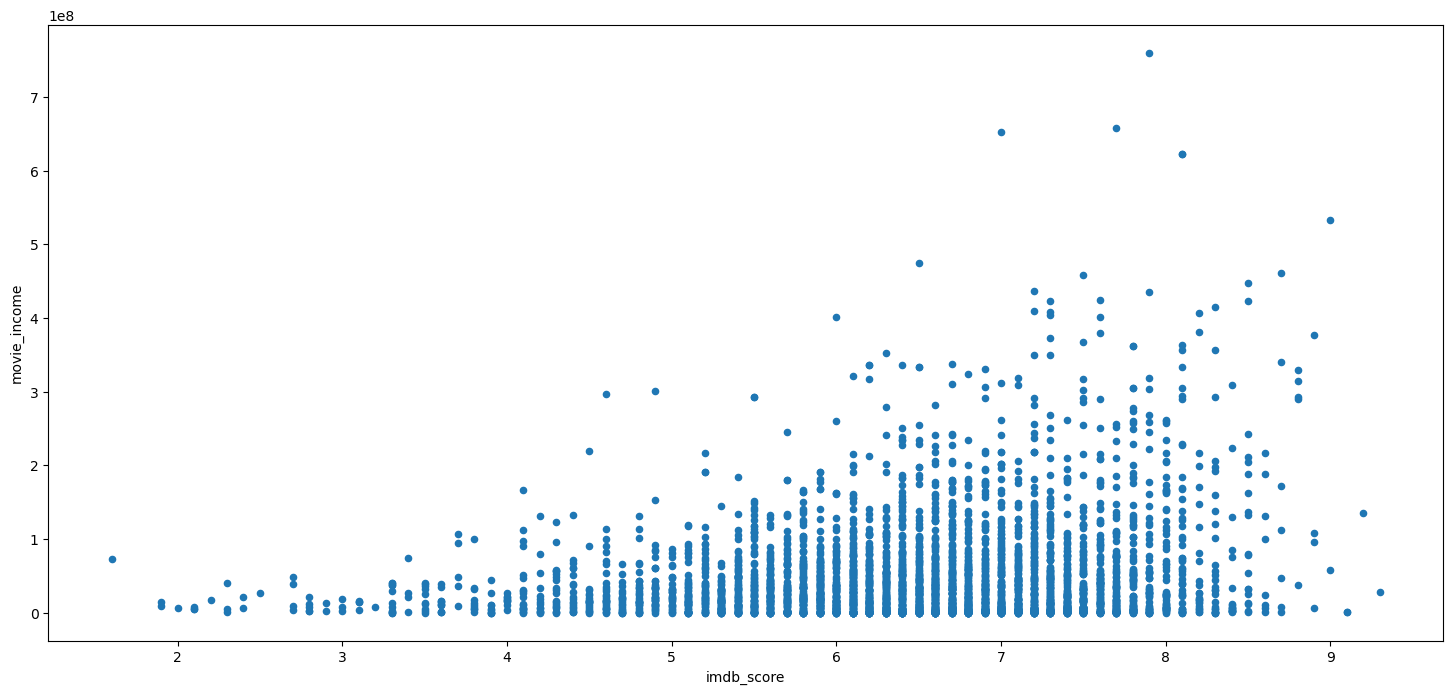

In [36]:
# sns.scatterplot(x=data_new['imdb_score'], y=data_new['movie_income'])
data_new.plot.scatter(x='imdb_score', y='movie_income', figsize=(18,8))

Let's generate the correlation matrix

In [37]:
data_new.corr()

,imdb_score,movie_income
imdb_score,1.000000,0.198021
movie_income,0.198021,1.000000
